In [38]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

sns.set_theme(style="whitegrid")

In [39]:
# Path to raw dataset
data_path = "../data/raw/predictive_maintenance_dataset.csv"

df = pd.read_csv(data_path)
df.head()

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
0,1/1/2015,S1F01085,0,215630672,55,0,52,6,407438,0,0,7
1,1/1/2015,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,1/1/2015,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,1/1/2015,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,1/1/2015,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [76]:
# Finding out no. of rows and columns 
df.shape

(124494, 14)

In [41]:
# Listing the names of all the columns
df.columns

Index(['date', 'device', 'failure', 'metric1', 'metric2', 'metric3', 'metric4',
       'metric5', 'metric6', 'metric7', 'metric8', 'metric9'],
      dtype='str')

In [77]:
# Fetching the number and percentage of Failures
df["failure"].value_counts(), df["failure"].value_counts(normalize=True)

(failure
 0    124388
 1       106
 Name: count, dtype: int64,
 failure
 0    0.999149
 1    0.000851
 Name: proportion, dtype: float64)

In [78]:
# Checking for missing values
df.isna().sum().sort_values(ascending=False)

date           0
device         0
failure        0
metric1        0
metric2        0
metric3        0
metric4        0
metric5        0
metric6        0
metric7        0
metric8        0
metric9        0
month          0
day_of_week    0
dtype: int64

In [44]:
df.dtypes

date         str
device       str
failure    int64
metric1    int64
metric2    int64
metric3    int64
metric4    int64
metric5    int64
metric6    int64
metric7    int64
metric8    int64
metric9    int64
dtype: object

### Converting date datatype from string to datetime so ML can use time-based numerical features. 
(since models understand numeric order and time differences, not raw text dates)

In [45]:
# Date's datatype conversion

df["date"] = pd.to_datetime(df["date"], errors="coerce")

df["date"].dtype, df["date"].isna().sum()


(dtype('<M8[us]'), np.int64(0))

In [46]:
# Extracting month and day from date
df["month"] = df["date"].dt.month
df["day_of_week"] = df["date"].dt.dayofweek
df[["date","month", "day_of_week"]].head()

,date,month,day_of_week
0,2015-01-01,1,3
1,2015-01-01,1,3
2,2015-01-01,1,3
3,2015-01-01,1,3
4,2015-01-01,1,3


## Monthly Failure Rate Analysis



### To understand whether machine failures follow seasonal patterns, we group the dataset by **month** to summarize failure behavior across different months of the year, and then compute and visualize the monthly failure rate.

In [47]:
# Monthly Aggregation of Machine Failures

monthly = df.groupby("month").agg(
    total_rows=("failure", "size"),
    failures=("failure", "sum")
)

monthly["failure_rate"] = monthly["failures"]/monthly["total_rows"]

monthly

,total_rows,failures,failure_rate
month,,,
1,25032,24,0.000959
2,19500,14,0.000718
3,19833,9,0.000454
4,12012,9,0.000749
5,11330,21,0.001853
6,10469,6,0.000573
7,10531,16,0.001519
8,8346,4,0.000479
9,4470,0,0.000000


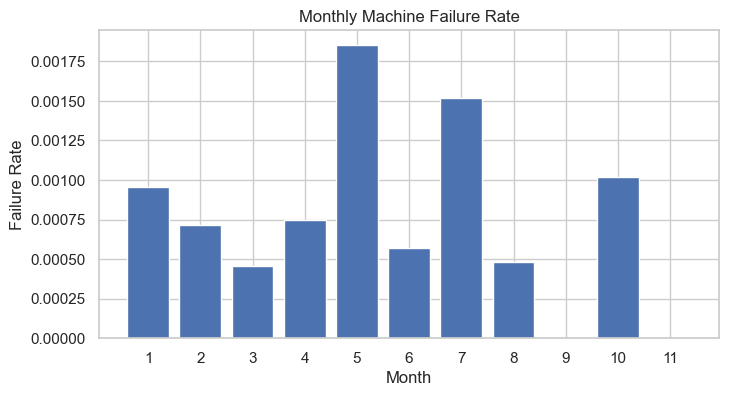

In [53]:
plt.figure(figsize=(8,4))
plt.bar(monthly.index, monthly["failure_rate"])

plt.xticks(range(1,12))

plt.xlabel("Month")
plt.ylabel("Failure Rate")
plt.title("Monthly Machine Failure Rate")

plt.show()

The bar chart above shows the proportion of machine failures for each month in the available dataset.

### Key observations
- The **failure rate peaks in May**, with **July** showing the second
  highest level of failures.
- **March and August** exhibit comparatively **lower failure rates**.
- The dataset does **not include December**, limiting full-year
  seasonal interpretation.

### Interpretation
The variation in failure rates across months suggests the presence of
**time-dependent operational or environmental influences** on machine
reliability. Peaks during mid-year months may indicate:

- increased **operational load or utilization**
- **temperature or environmental stress**
- alignment with **maintenance or production cycles**

Although the dataset does not span a complete year, the observed
patterns indicate that **temporal features** such as **month** may carry
**predictive value** and should be considered during model development.

## Weekday Failure Rate Analysis


### To examine whether machine failures are influenced by weekly operational patterns, we group the dataset by **day of the week** and compute the corresponding failure probability for each weekday then visualize it.

### This helps identify whether machines fail more frequently during **high-workload weekdays** or during **low-activity weekend periods**, providing further insight into potential correlations with operational stress or maintenance behavior.

In [55]:
# Weekday Aggregation of Machine Failures

weekday = df.groupby("day_of_week").agg(
    total_rows = ("failure", "size"),
    failures = ("failure", "sum")   
)

weekday["failure_rate"] = weekday["failures"]/weekday["total_rows"]

weekday

,total_rows,failures,failure_rate
day_of_week,,,
0,17886,27,0.001510
1,17534,18,0.001027
2,17136,15,0.000875
3,18141,22,0.001213
4,18041,12,0.000665
5,17897,8,0.000447
6,17859,4,0.000224


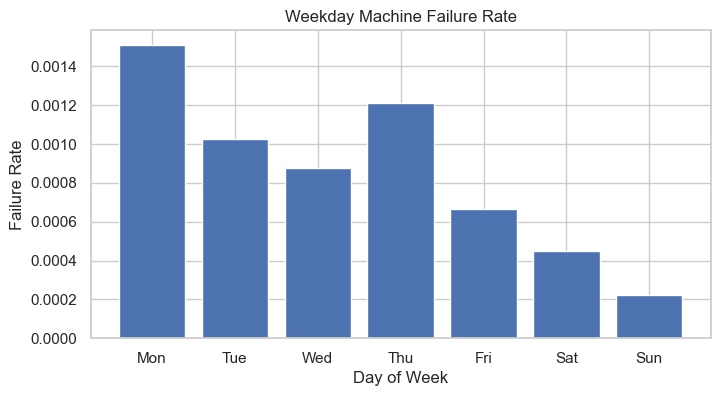

In [56]:
plt.figure(figsize=(8, 4))
plt.bar(weekday.index, weekday["failure_rate"])

plt.xticks(range(0, 7), ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])

plt.xlabel("Day of Week")
plt.ylabel("Failure Rate")
plt.title("Weekday Machine Failure Rate")

plt.show()

 The bar chart above shows the proportion of machine failures for each day of the week in the available dataset.


### Key Observations

- The failures **peak at the start of the week**, with **Monday**
  showing the highest failure rate and **Thursday** following closely.
- Failure probabilities decline steadily **toward the weekend** with **Thursday** being the notable exception.
- **Saturday and Sunday record the lowest failure rates**, hinting at
  reduced operational load or the presence of scheduled maintenance
  activity during non-peak production periods.


### Interpretation

The pronounced weekday–weekend contrast suggests that machine
failures are influenced more by **operational workload and usage
patterns** than by purely random hardware degradation.

This indicates that **'day_of_week' is a meaningful temporal feature**
that may improve predictive performance in downstream machine
learning models for predictive maintenance.

## Feature Correlation Analysis

In [62]:
metrics = [col for col in df.columns if col.startswith("metric")]

metric_means = df.groupby("failure")[metrics].mean().T

metric_means

failure,0,1
metric1,1.223840e+08,1.271755e+08
metric2,1.561267e+02,4.109434e+03
metric3,9.946040e+00,3.905660e+00
metric4,1.696048e+00,5.463208e+01
metric5,1.422161e+01,1.546226e+01
metric6,2.601743e+05,2.583035e+05
metric7,2.666817e-01,3.062264e+01
metric8,2.666817e-01,3.062264e+01
metric9,1.300527e+01,2.308491e+01


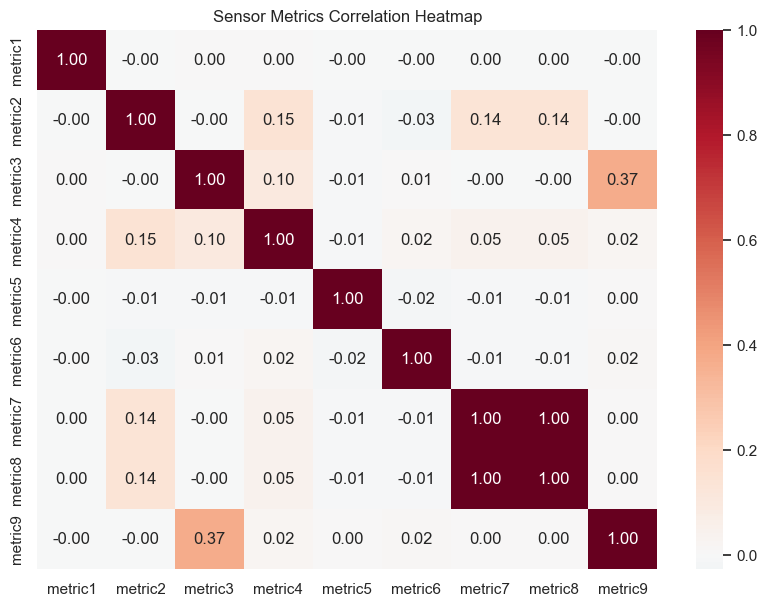

In [75]:
#Forming correlation matrix of sensor metrics
corr_matrix = df[metrics].corr()

#Plotting a heatmap
plt.figure(figsize=(10,7))
sns.heatmap(corr_matrix, annot=True, cmap = "RdBu_r", fmt=".2f", center=0)

plt.title("Sensor Metrics Correlation Heatmap")
plt.show() 



To assess redundancy among sensor measurements, we computed the **pairwise correlation matrix** of all metric features and visualized it using a heatmap.

The analysis shows that **metric7** and **metric8** are perfectly correlated (correlation = 1.00), indicating that they represent **identical underlying information**.  
Keeping both features would introduce **multicollinearity** without improving predictive capability.

Therefore, **metric8** is removed while **metric7** is retained as the representative variable.

All remaining sensor metrics display **low to moderate correlations**, suggesting that they contribute distinct information useful for downstream machine learning models in predictive maintenance.